# **THE SPARKS FOUNDATION**
## **Graduate Rotational Internship Program(GRIP) **


## **TASK 1 - Prediction using Supervised ML**

### *Data Set--> http://bit.ly/w-data*


#### *Predict the percentage of an student based on the no. of study hours.
This is a simple linear regression task as it involves just 2 variables.*


#### *Quation-->What will be predicted score if a student studies for 9.25 hrs/ day?*

## *Student name-:Shivani Hemant Mutke.*

In [1]:
#removes warning
import warnings
warnings.filterwarnings('ignore')

## *importing libraries for manipulation data set*


In [2]:

import pandas as pd
import numpy as np


# *libraries for representing result in graphical format*

In [3]:


import matplotlib.pyplot as plt 
import seaborn as sns


In [4]:
# libraries for model creation
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

## *Data set contents*
#### *Hours,Scores
2.5,21
5.1,47
3.2,27
8.5,75
3.5,30
1.5,20
9.2,88
5.5,60
8.3,81
2.7,25
7.7,85
5.9,62
4.5,41
3.3,42
1.1,17
8.9,95
2.5,30
1.9,24
6.1,67
7.4,69
2.7,30
4.8,54
3.8,35
6.9,76
7.8,86*

## *Reading the Data *

In [5]:

data = pd.read_csv('http://bit.ly/w-data')#reading data directly from url
print("Data is successfully imported")
data #records

Data is successfully imported


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


## *Check if there any null value in the Dataset*

In [6]:
## Now print the first 5 records...

data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [7]:
##Now print the last 5 records...

data.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [8]:
#here we use describe() method so that we can able to see percentiles,mean,std,max,count of the given dataset.
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [9]:
data.isnull == True

False

In [10]:
#Let's print the full summary of the dataframe .
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


## *since we have found there is no null value we can visualize data*

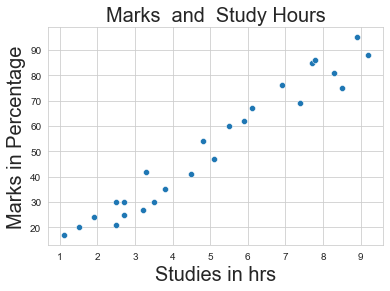

In [11]:
sns.set_style("whitegrid")
sns.scatterplot(y= data['Scores'], x= data['Hours'])
plt.title('Marks  and  Study Hours',size=20)
plt.ylabel('Marks in Percentage', size=20)
plt.xlabel('Studies in hrs', size=20)
plt.show()

## *From the above scatter plot there looks to be correlation between the 'Marks Percentage' and 'Hours Studied', Lets plot a regression line to confirm the correlation.*

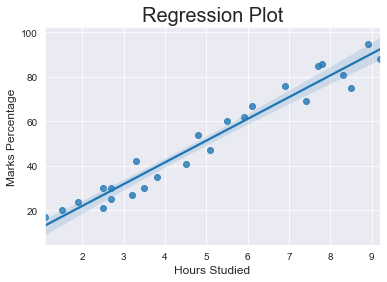

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


In [12]:
sns.set_style("darkgrid")


sns.regplot(x= data['Hours'], y= data['Scores'])
plt.title('Regression Plot',size=20)
plt.ylabel('Marks Percentage', size=12)
plt.xlabel('Hours Studied', size=12)
plt.show()
print(data.corr())

## *It is confirmed that the variables are positively correlated.*

## now we should start to train the model

### 1) Splitting the Data

In [13]:
# Defining X and y from the Data
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values


In [14]:

# Spliting the Data in two
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0)

### 2) Fitting the Data into the model

In [15]:
regression = LinearRegression()
regression.fit(train_X, train_y)
print("** ** ** Our model is trained now** ** **")

** ** ** Our model is trained now** ** **


### *3)Predicting the Percentage of Marks*

In [16]:
pred_y = regression.predict(val_X)
predicted = pd.DataFrame({'Hours': [i[0] for i in val_X], 'Predicted Marks': [k for k in pred_y]})
predicted

,Hours,Predicted Marks
0,1.5,16.844722
1,3.2,33.745575
2,7.4,75.500624
3,2.5,26.786400
4,5.9,60.588106
5,3.8,39.710582
6,1.9,20.821393


### *4) for validation we can compaired the Predicted Marks with the Actual Marks*

In [17]:
comparison = pd.DataFrame({'Actual Marks': val_y, 'Predicted Marks': pred_y})
comparison

,Actual Marks,Predicted Marks
0,20,16.844722
1,27,33.745575
2,69,75.500624
3,30,26.786400
4,62,60.588106
5,35,39.710582
6,24,20.821393


## Predicting the Error

In [18]:
import sklearn.metrics as metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [19]:
MSE = metrics.mean_squared_error(val_y,pred_y)
root_E = np.sqrt(metrics.mean_squared_error(val_y,pred_y))
Abs_E = np.sqrt(metrics.mean_squared_error(val_y,pred_y))
print("Mean Squared Error      = ",MSE)
print("Root Mean Squared Error = ",root_E)
print("Mean Absolute Error     = ",Abs_E)

Mean Squared Error      =  20.33292367497997
Root Mean Squared Error =  4.5092043283688055
Mean Absolute Error     =  4.5092043283688055


###  *5)Visually Comparing the Predicted Marks with the Actual Marks*

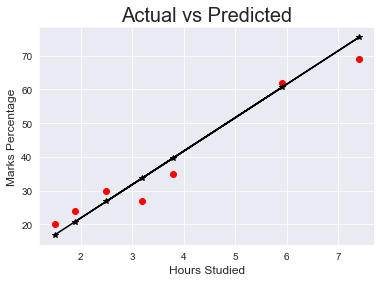

In [20]:
plt.scatter(x=val_X, y=val_y, color='red')
plt.plot(val_X, pred_y, color='Black',marker='*')
plt.title('Actual vs Predicted', size=20)
plt.ylabel('Marks Percentage', size=12)
plt.xlabel('Hours Studied', size=12)
plt.show()

### *6)Evaluating the Model by calculating the accuracy of the model* 

In [21]:
print('Mean absolute error value : ',mean_absolute_error(val_y,pred_y))

Mean absolute error value :  4.130879918502486


### ** CONCLUSION-->Small value of Mean absolute error means the  chances of error or wrong preditction by  the model is  very less.**

##  Our question-->What will be the predicted score of a student if he/she studies for 9.25 hrs/ day?

In [22]:
hours = [9.25]
answer = regression.predict([hours])
print("predicted marks of question = {}".format(round(answer[0],3)))

predicted marks of question = 93.893


# According to the regression model if a student studies for 9.25 hours a day he/she is likely to score 93.89 marks.